In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

# Load train data
data_dir = "../data/tiny_imagenet"

class_id_to_name = {}
class_name_to_id = {}
with open(os.path.join(data_dir, "wnids.txt"), "r") as f:
    for i, line in enumerate(f.readlines()):
        name = line.strip()
        class_id_to_name[i] = name
        class_name_to_id[name] = i
    
class_name_to_real_name = {}    
with open(os.path.join(data_dir, "words.txt"), "r") as f:
    for i, line in enumerate(f.readlines()):
        line_split = line.strip().split("\t")
        class_name_to_real_name[line_split[0]] = line_split[1]

ID 5 n01641577
Description: bullfrog, Rana catesbeiana


c:\anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


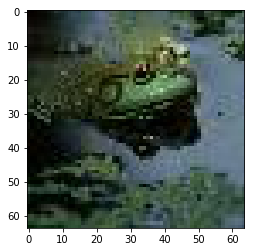

In [47]:
tfrecords = list(tf.python_io.tf_record_iterator(path="tiny_imagenet_1_train.tfrecord"))
string_record = tfrecords[np.random.randint(0, len(tfrecords))]
example = tf.train.Example()
example.ParseFromString(string_record)
image_raw = (example.features.feature['image_raw'].bytes_list.value[0])
label = int(example.features.feature['label'].int64_list.value[0])
image = np.fromstring(image_raw, dtype=np.float32)
image = image.reshape((64, 64, 3))

print("ID {} {}".format(label, class_id_to_name[label]))
print("Description:", class_name_to_real_name[class_id_to_name[label]])
plt.imshow(image)

ID 9 n03970156
Description: plunger, plumber's helper


c:\anaconda3\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


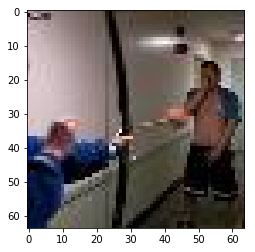

In [52]:
tfrecords = list(tf.python_io.tf_record_iterator(path="tiny_imagenet_1_val.tfrecord"))
string_record = tfrecords[np.random.randint(0, len(tfrecords))]
example = tf.train.Example()
example.ParseFromString(string_record)
image_raw = (example.features.feature['image_raw'].bytes_list.value[0])
label = int(example.features.feature['label'].int64_list.value[0])
image = np.fromstring(image_raw, dtype=np.float32)
image = image.reshape((64, 64, 3))

print("ID {} {}".format(label, class_id_to_name[label]))
print("Description:", class_name_to_real_name[class_id_to_name[label]])
plt.imshow(image)

In [39]:
from dataset import parse_record_fn, get_dataset_size

# Initialize TFRecordDataset from file
dataset = tf.data.TFRecordDataset(["tiny_imagenet_1_train.tfrecord"])
dataset = dataset.prefetch(buffer_size=1)
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.map(parse_record_fn, num_parallel_calls=5)
dataset = dataset.batch(1)
dataset = dataset.prefetch(1)

# The op for initializing the variables.
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

counter = [0]*10

with tf.Session() as sess:
    sess.run(init_op)
    
    itr = dataset.make_one_shot_iterator()
    image, label = itr.get_next()
    #sess.run(itr.initializer)
    
    for i in range(get_dataset_size("tiny_imagenet_1_train.tfrecord")):
        img, lbl = sess.run([image, label])
        
        lbl = lbl[0]
        counter[lbl]+=1        
        img = img[0,:,:,:]
        img -= np.min(img)
        img /= np.max(img)
        
        #print("ID {} {}".format(lbl, class_id_to_name[lbl]))
        #print("Description:", class_name_to_real_name[class_id_to_name[lbl]])
        
        #io.imshow(img)
        #io.show()

In [63]:
get_dataset_size("tiny_imagenet_train.tfrecord")

5000

In [64]:
get_dataset_size("tiny_imagenet_val.tfrecord")

500

In [40]:
counter

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [88]:
print("Description:", class_name_to_real_name[class_id_to_name[9]])

Description: plunger, plumber's helper


In [60]:
from dataset import parse_record_fn, get_dataset_size

# Initialize TFRecordDataset from file
dataset = tf.data.TFRecordDataset(["tiny_imagenet_1_val.tfrecord"])
dataset = dataset.prefetch(buffer_size=1)
dataset = dataset.shuffle(buffer_size=1000)
dataset = dataset.map(parse_record_fn, num_parallel_calls=5)
dataset = dataset.batch(1)
dataset = dataset.prefetch(1)

# The op for initializing the variables.
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())

counter = [0]*10

with tf.Session() as sess:
    sess.run(init_op)
    
    itr = dataset.make_one_shot_iterator()
    image, label = itr.get_next()
    #sess.run(itr.initializer)
    
    for i in range(get_dataset_size("tiny_imagenet_1_val.tfrecord")):
        img, lbl = sess.run([image, label])
        
        lbl = lbl[0]
        counter[lbl]+=1        
        img = img[0,:,:,:]
        img -= np.min(img)
        img /= np.max(img)
        
        #print("ID {} {}".format(lbl, class_id_to_name[lbl]))
        #print("Description:", class_name_to_real_name[class_id_to_name[lbl]])
        
        #io.imshow(img)
        #io.show()

In [61]:
counter

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]